* Exploration des données
* Sélection de 10 variables "métier" pour la suite de l'étude.
* input :r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/application_train.csv"
* output : '/Users/ndergham/Desktop/OpenClassrooms/P7/data/df.csv'

# Introduction

## Problématique

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser",  qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.
L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

## Données

* 10 fichiers CSV
* Vous aurez sûrement besoin de joindre les différentes tables entre elles.

## Votre mission

* Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
* Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.


Michaël, votre manager, vous incite à sélectionner un kernel Kaggle pour vous faciliter la préparation des données nécessaires à l’élaboration du modèle de scoring. Vous analyserez ce kernel et l’adapterez pour vous assurer qu’il répond aux besoins de votre mission.

Vous pourrez ainsi vous focaliser sur l’élaboration du modèle, son optimisation et sa compréhension.

Spécifications du dashboard
Michaël vous a fourni des spécifications pour le dashboard interactif. Celui-ci devra contenir au minimum les fonctionnalités suivantes :

* Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
* Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
* Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

## Imports et paramétrage

In [1]:
#Importation des librairies utiles pour le projet :

#built in
import statistics
import os, sys, time, random
from collections import Counter

#data
import pandas as pd
import numpy as np

#stats
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#viz
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from PIL import Image

# modelisation
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
#Importation des jeux de données utiles pour le projet :

#df2 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/application_test.csv")
df1 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/application_train.csv")
#df3 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/bureau.csv")
#df4 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/bureau_balance.csv")
#df5 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/credit_card_balance.csv")
#df6 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/HomeCredit_columns_description.csv")
#df7 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/installments_payments.csv")
#df8 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/POS_CASH_balance.csv")
#df9 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/previous_application.csv")
#df10 = pd.read_csv(r"C:\/Users\ndergham\Desktop\OpenClassrooms\P7\data/sample_submission.csv")

# Comprendre la forme et la structure des données

## Jeux de données

On va regarder rapidement les informations contenues dans le jeu de données choisi pour savoir lesquelles sont intéressantes.
Le jeu de données comporte 122 colonnes.

In [4]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df1.shape

(307511, 122)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Il y a trop de colonnes pour que la fonction *info()* donctionne correctement, on va imprimer l'index *manuellement* :

In [7]:
# Noms des colonnes :

for i in df1 :
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [8]:
# Types des colonnes :

df1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
# Nombre de colonnes par type :

df1.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# Nombre de valeurs uniques par colonnes :
df1.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [11]:
# Rapide étude statistiques des colonnes de type integer ou float :

df1.describe(include = np.number)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
# Rapide étude statistiques des colonnes de type object :

df1.describe(include = object)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


## Traitement des valeurs manquantes

In [13]:
# Pourcentage des valeurs manquantes NaN par colonnes :

tmp = df1.isna().mean().sort_values()
tmp

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5 

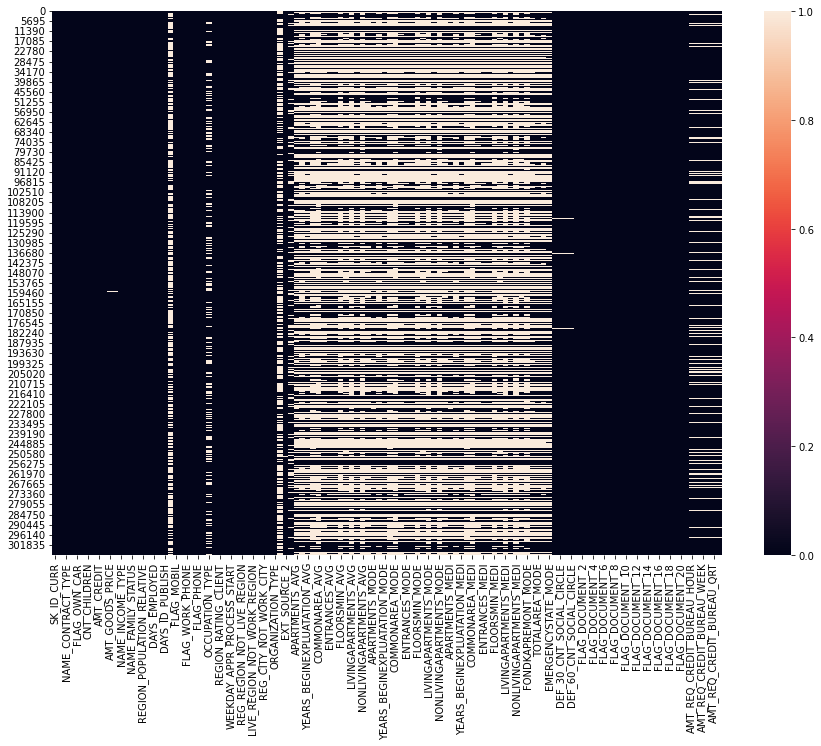

In [14]:
# On regarde comment les données sont remplies (données manquantes en beige et données remplies en noir)

fig= plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df1.isna());

## Traitement des valeurs dupliquées

On s'interesse ici aux valeurs dupliquées. On regarde leur existance ou non.

In [15]:
df1.duplicated().sum()

0

In [16]:
# Valeurs dupliquées par colonnes :

for col in df1.columns :
    n = df1.duplicated(subset =col).sum()
    print(f"col:{col}->duplicated : {n}")

col:SK_ID_CURR->duplicated : 0
col:TARGET->duplicated : 307509
col:NAME_CONTRACT_TYPE->duplicated : 307509
col:CODE_GENDER->duplicated : 307508
col:FLAG_OWN_CAR->duplicated : 307509
col:FLAG_OWN_REALTY->duplicated : 307509
col:CNT_CHILDREN->duplicated : 307496
col:AMT_INCOME_TOTAL->duplicated : 304963
col:AMT_CREDIT->duplicated : 301908
col:AMT_ANNUITY->duplicated : 293838
col:AMT_GOODS_PRICE->duplicated : 306508
col:NAME_TYPE_SUITE->duplicated : 307503
col:NAME_INCOME_TYPE->duplicated : 307503
col:NAME_EDUCATION_TYPE->duplicated : 307506
col:NAME_FAMILY_STATUS->duplicated : 307505
col:NAME_HOUSING_TYPE->duplicated : 307505
col:REGION_POPULATION_RELATIVE->duplicated : 307430
col:DAYS_BIRTH->duplicated : 290051
col:DAYS_EMPLOYED->duplicated : 294937
col:DAYS_REGISTRATION->duplicated : 291823
col:DAYS_ID_PUBLISH->duplicated : 301343
col:OWN_CAR_AGE->duplicated : 307448
col:FLAG_MOBIL->duplicated : 307509
col:FLAG_EMP_PHONE->duplicated : 307509
col:FLAG_WORK_PHONE->duplicated : 307509
col

La colonne *SK_ID_CURR* ne contient pas de valeurs dupliquées, c'est ce qui était attendu car il s'agit de la clef d'identification d'un client. Il doit être unique par client.

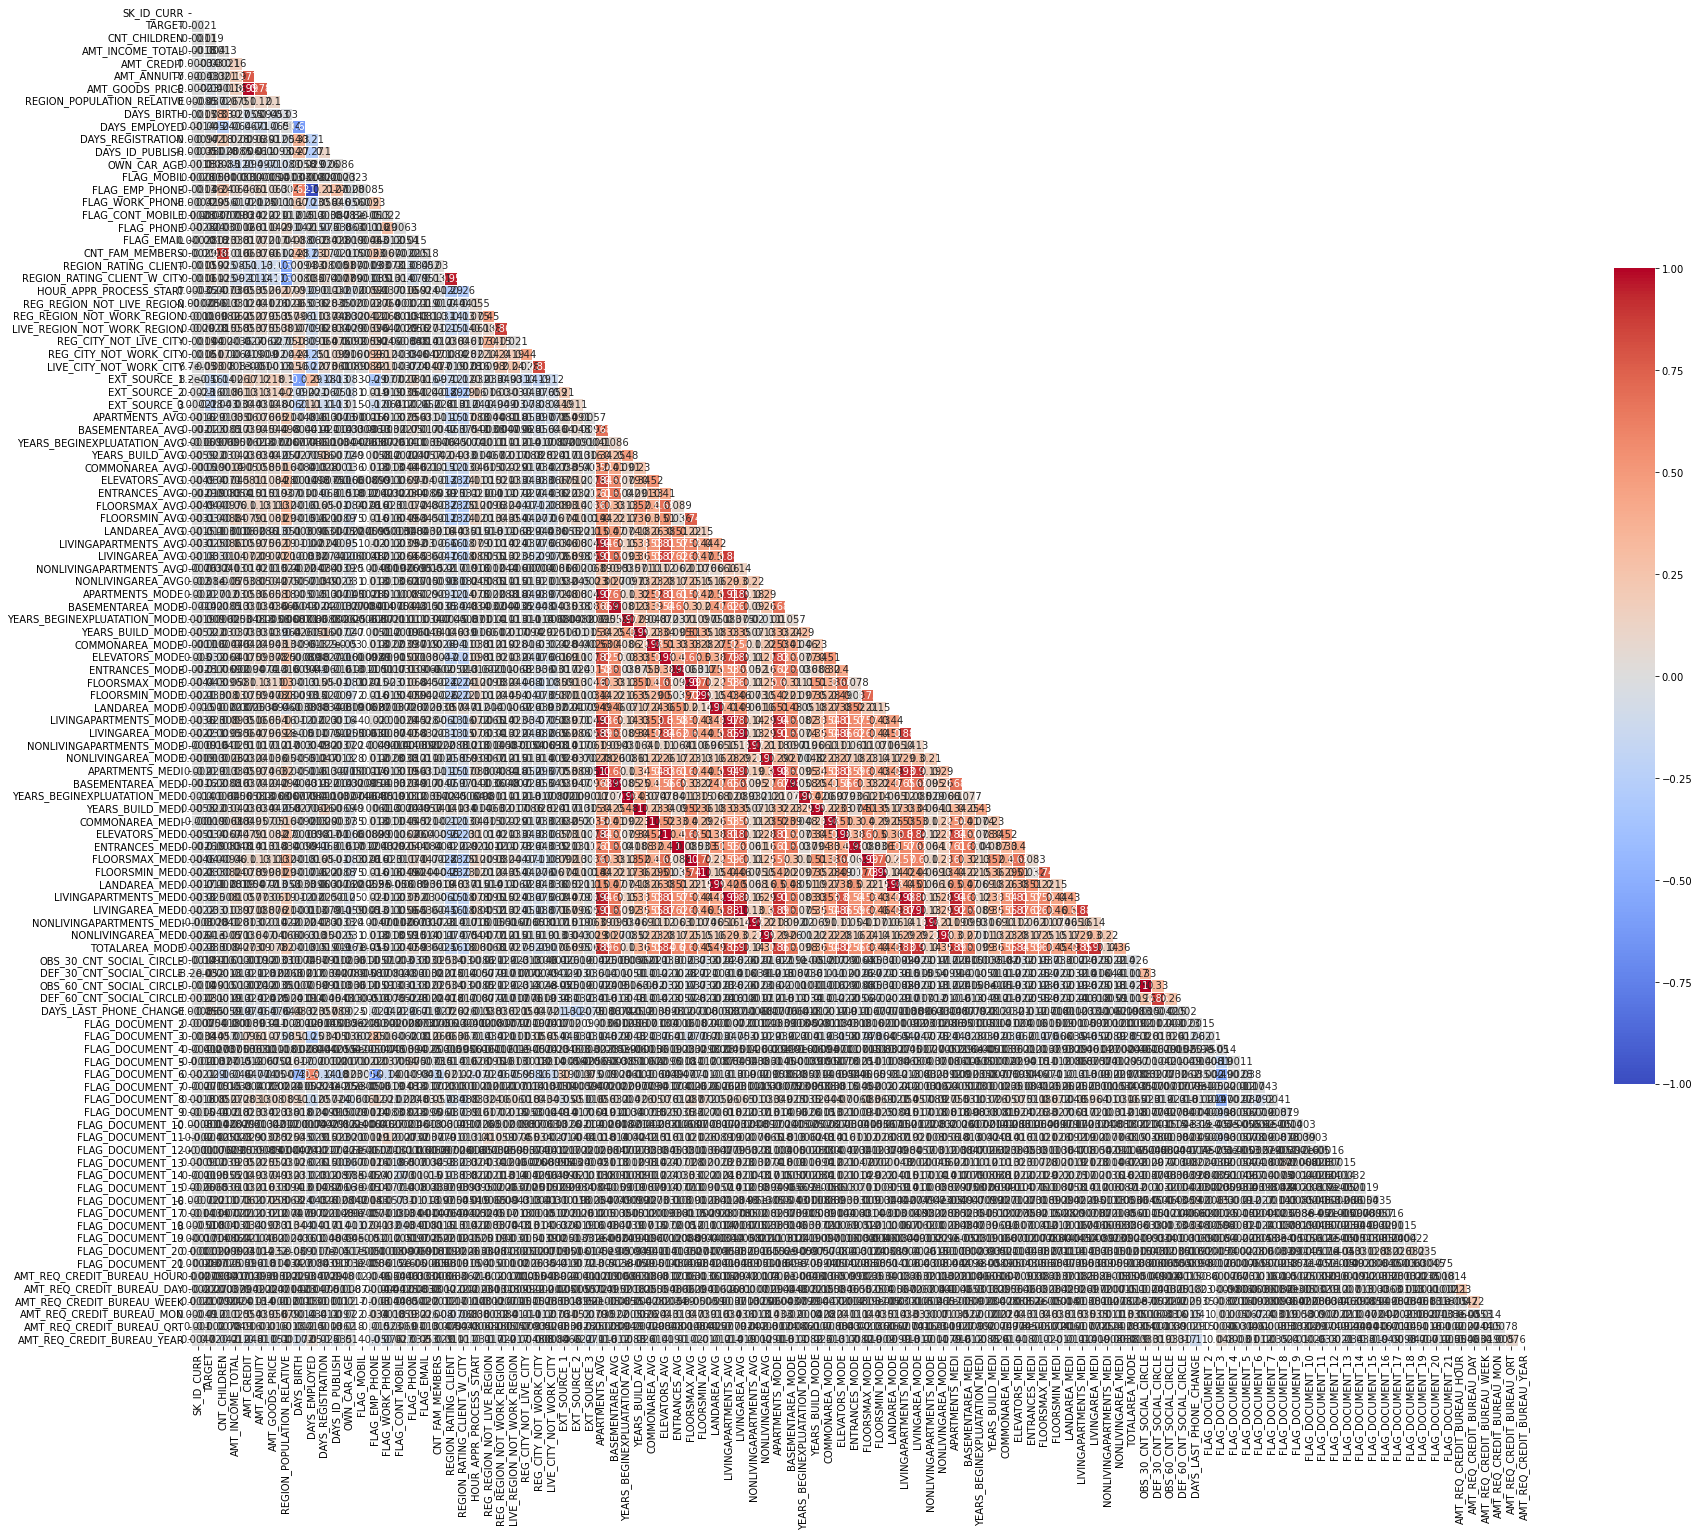

In [17]:
# Création de la matrice de correlation :

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Le jeu de données contient beaucoup de variables, la matrice de corrélation de Pearson n'est pas très lisible.
On va sélectionner de manière arbitraire une partie des variables correcpondant à des problématiques métier compréhensibles. 

In [18]:
# On ne va garder que les colonnes qui nous interesse pour la problématique

cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", 
        "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_EDUCATION_TYPE"]
data = df1[cols]
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE
0,100002,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special
1,100003,0,Cash loans,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Higher education
2,100004,0,Revolving loans,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special
3,100006,0,Cash loans,N,Y,0,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special
4,100007,0,Cash loans,N,Y,0,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special


In [19]:
# Rapide étude statistiques des colonnes de type integer ou float :

data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [20]:
# Pourcentage des valeurs manquantes NaN par colonnes :

tmp = data.isna().mean().sort_values()
tmp

SK_ID_CURR             0.000000
TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
NAME_EDUCATION_TYPE    0.000000
AMT_ANNUITY            0.000039
AMT_GOODS_PRICE        0.000904
dtype: float64

In [21]:
# Type des colonnes :

data.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
dtype: object

In [22]:
# Création du même jeu de donnée, sans valeur manquante :

data_nan = data[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "NAME_EDUCATION_TYPE"]].dropna() #subset the dataframe

# Statistique

## Corrélation de Spearman

La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent corrélées sans que la relation entre les deux variables soit de type affine. 

Elle consiste à trouver un coefficient de corrélation, non pas entre les valeurs prises par les deux variables mais entre les rangs de ces valeurs. 

Elle estime à quel point la relation entre deux variables peut être décrite par une fonction monotone. S'il n'y a pas de données répétées, une corrélation de Spearman parfaite de +1 ou -1 est obtenue quand l'une des variables est une fonction monotone parfaite de l'autre.

In [23]:
stats.spearmanr(data_nan.TARGET, data_nan.CNT_CHILDREN)

SpearmanrResult(correlation=0.020085061483490534, pvalue=8.596227614864018e-29)

In [24]:
stats.spearmanr(data_nan.TARGET, data_nan.AMT_INCOME_TOTAL)

SpearmanrResult(correlation=-0.01805756649513918, pvalue=1.3825938712974425e-23)

In [25]:
stats.spearmanr(data_nan.TARGET, data_nan.AMT_CREDIT)

SpearmanrResult(correlation=-0.017570910669030573, pvalue=2.0389061096127213e-22)

In [26]:
stats.spearmanr(data_nan.TARGET, data_nan.AMT_ANNUITY)

SpearmanrResult(correlation=-7.267748246070391e-05, pvalue=0.9678673772997108)

In [27]:
stats.spearmanr(data_nan.TARGET, data_nan.AMT_GOODS_PRICE)

SpearmanrResult(correlation=-0.03149384585297056, pvalue=2.8632614797734704e-68)

Les valeurs calculées ici montrent que les variables ne sont pas corrélées à la cible "TARGET".

## Correlation de Pearson

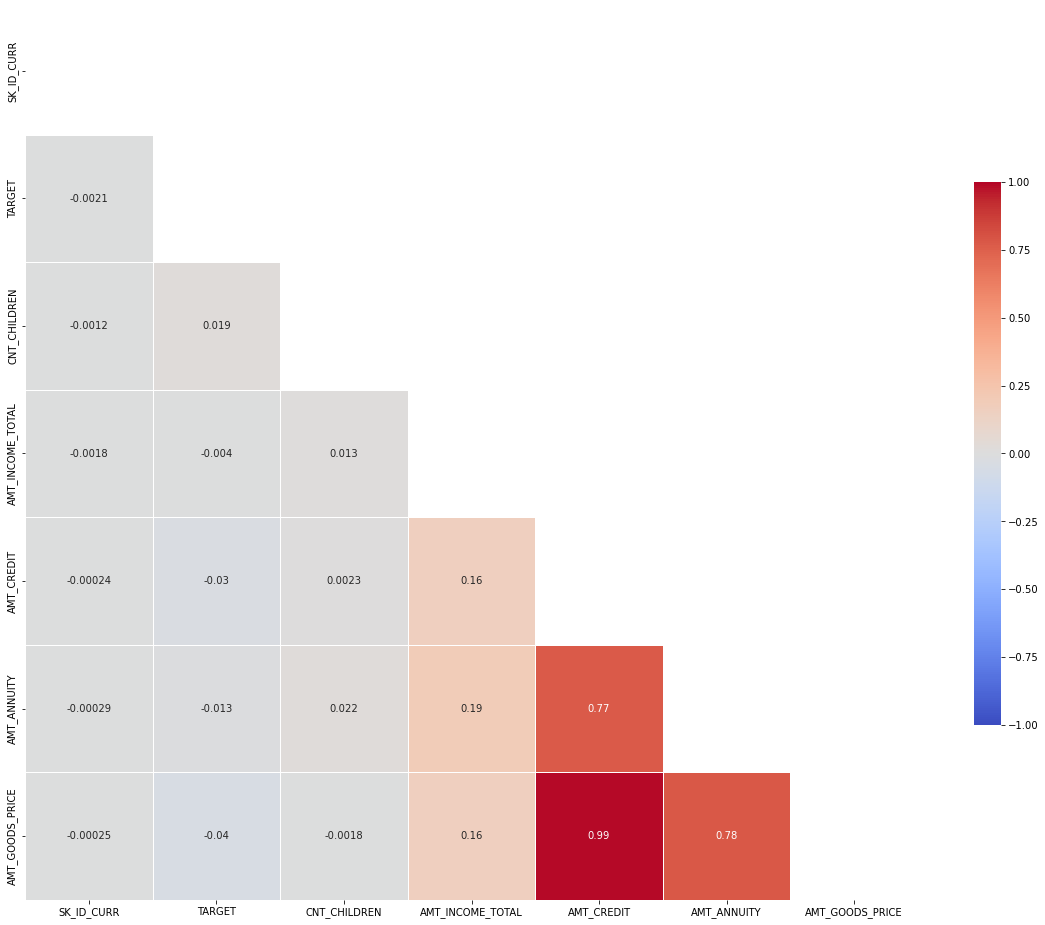

In [28]:
# Création de la matrice de correlation :

# Compute the correlation matrix
corr = data_nan.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

"AMT_CREDIT", "AMT_ANNUITY" et "AMT_GOODS_PRICE" sont linéairement corrélées entre elles (ce qui semble logique d'un point de vu "métier")

In [23]:
# Export du jue de donnée de travail :

data.to_csv('/Users/ndergham/Desktop/OpenClassrooms/P7/data/df.csv', index = False)